In [1]:
import pandas as pd
import numpy as np
import seaborn as  sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore' )


In [106]:
appdata =pd.read_csv("FineTech_appData.csv")
screens_data =pd.read_csv("top_screens.csv")

In [40]:
appdata.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [41]:
print(appdata.shape)
appdata.info()

(50000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [42]:
appdata.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [108]:
appdata['hour']= appdata['hour'].str.slice(1,3).astype(int)

# EDA

Data is in non Linear format as represented in pairplot

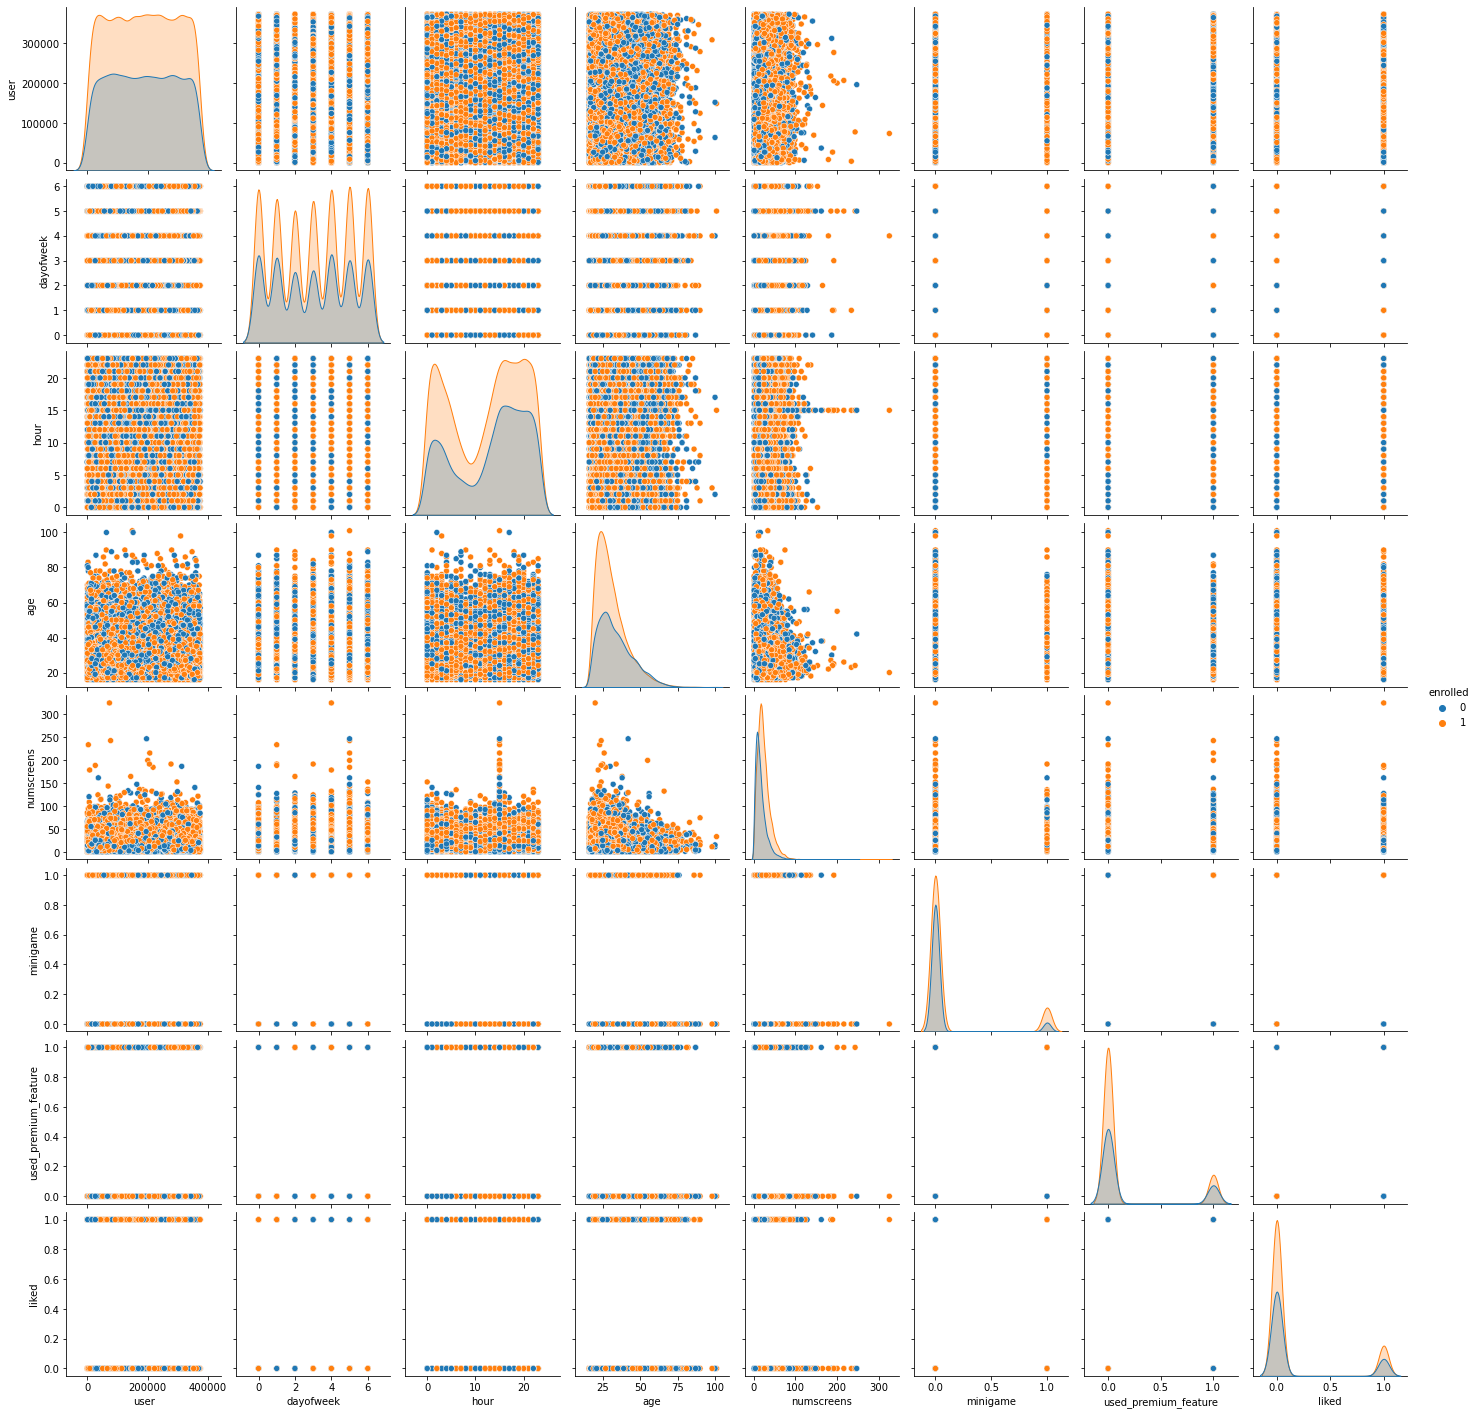

In [109]:
sns.pairplot(appdata,hue='enrolled')

No correlation major observed between independent and dependent variable 

<AxesSubplot:>

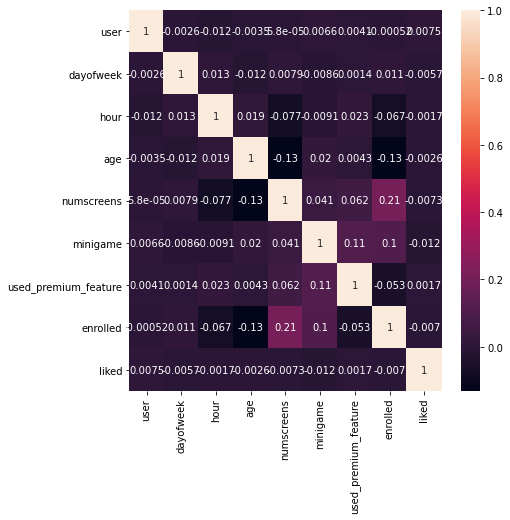

In [44]:
plt.figure(figsize=(7,7))
sns.heatmap(appdata.corr(),annot= True)

numscreens and minigame are positively correlation with target variable enrolled

Hour,used_premium_feature and age are negatively correlation with target variable enrolled

<AxesSubplot:title={'center':'Correlation with Response Variable'}>

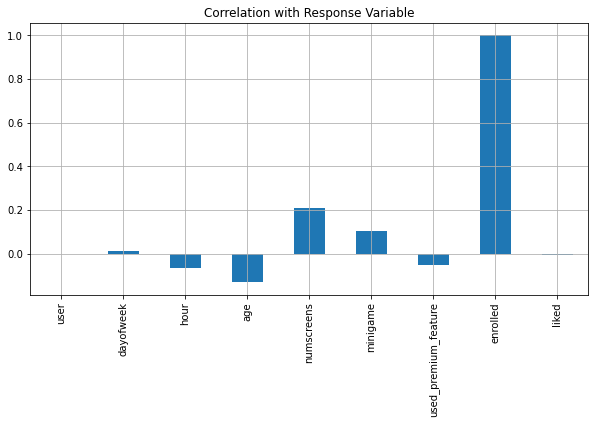

In [45]:
appdata.corrwith(appdata.enrolled).plot.bar(figsize=(10,5),title = 'Correlation with Response Variable',
                                                   fontsize = 10, grid = True)

In [46]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

# Target Variable Distribution 

User likely to enrolled to application is higher

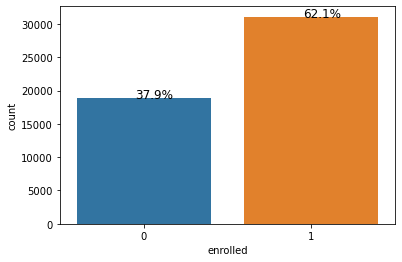

In [47]:
ax =sns.countplot(appdata['enrolled'])
without_hue(ax,appdata['enrolled'])

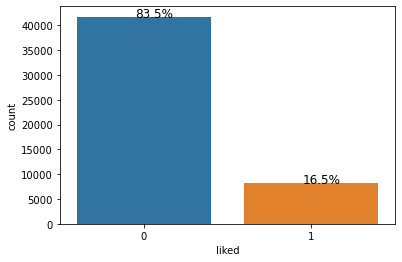

In [48]:
ax =sns.countplot(appdata['liked'])
without_hue(ax,appdata['liked'])

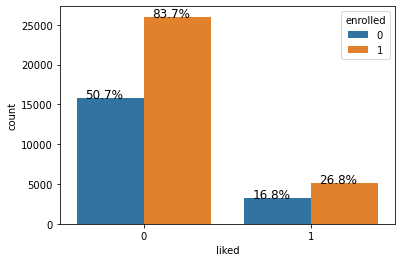

In [49]:
ax =sns.countplot(appdata['liked'],hue=appdata['enrolled'])
with_hue(ax, appdata['enrolled'], 2, 2)

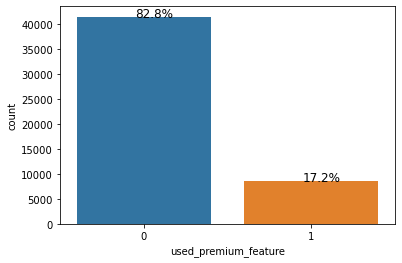

In [50]:
ax =sns.countplot(appdata['used_premium_feature'])
without_hue(ax,appdata['used_premium_feature'])

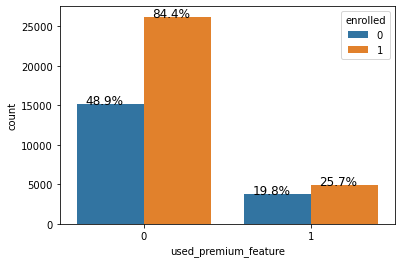

In [51]:
ax= sns.countplot(appdata['used_premium_feature'],hue=appdata['enrolled'])
with_hue(ax, appdata['enrolled'], 2, 2)

# Age Wise Distribution

User Age Between 20-35 are Likely to enrolled

<AxesSubplot:xlabel='age', ylabel='Count'>

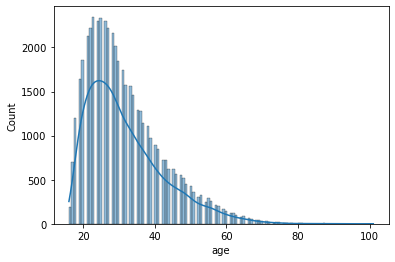

In [52]:
sns.histplot(appdata['age'],kde=True,)

<AxesSubplot:xlabel='age', ylabel='Count'>

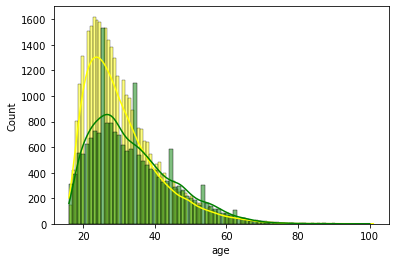

In [53]:
sns.histplot(appdata['age'][appdata['enrolled']==1],kde=True,color='Yellow')
sns.histplot(appdata['age'][appdata['enrolled']==0],kde=True,color='green')

# App Usage Distribution

<AxesSubplot:xlabel='numscreens', ylabel='Density'>

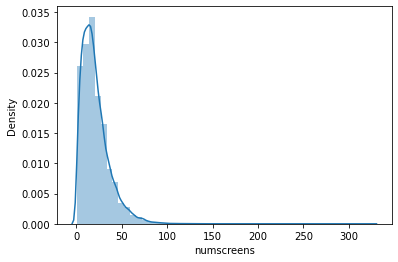

In [54]:
sns.distplot(appdata['numscreens'])

<AxesSubplot:xlabel='age', ylabel='numscreens'>

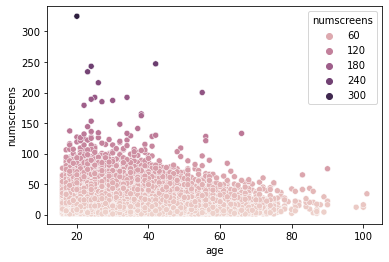

In [55]:
sns.scatterplot(x=appdata['age'],y=appdata['numscreens'],hue=appdata['numscreens'])

User with High Application usage are Likely to enrolled

<AxesSubplot:xlabel='age', ylabel='numscreens'>

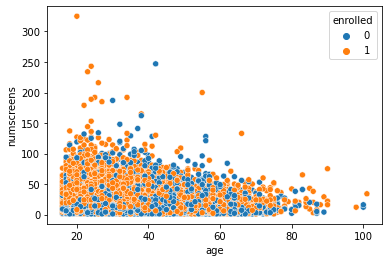

In [56]:
sns.scatterplot(x=appdata['age'],y=appdata['numscreens'],hue=appdata['enrolled'])

# Hourly and Day wise Distribution

<AxesSubplot:xlabel='hour', ylabel='count'>

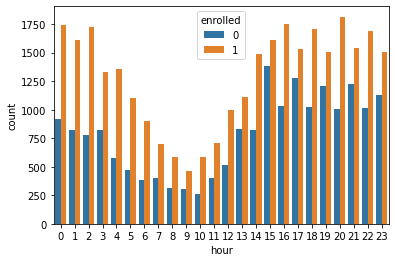

In [57]:
sns.countplot(appdata['hour'],hue=appdata['enrolled'])

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

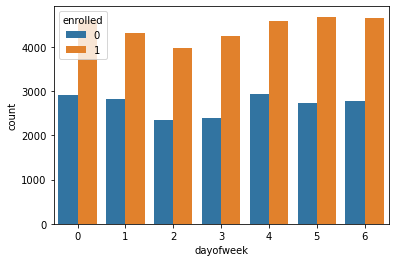

In [58]:
sns.countplot(appdata['dayofweek'],hue=appdata['enrolled'])

In [59]:
df =appdata

# Preprocessing screen_list Feature

In [60]:
appdata['screen_list'] = appdata['screen_list'].str.split(',')

In [61]:
top_screens =screens_data['top_screens'].values

In [62]:
appdata[top_screens]= np.nan

In [63]:
for i in range(len(appdata['screen_list'])):
    a = appdata['screen_list'][i]
    for j in a:
        if j in top_screens:
            appdata[j][i] = 1

In [64]:
appdata[top_screens] =appdata[top_screens].fillna(0)
appdata[top_screens] =appdata[top_screens].astype(int)

In [65]:
appdata[top_screens].columns

Index(['Loan2', 'location', 'Institutions', 'Credit3Container', 'VerifyPhone',
       'BankVerification', 'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry',
       'Cycle', 'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category',
       'Splash', 'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1',
       'EditProfile', 'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1',
       'Alerts', 'Saving8', 'Saving10', 'Leaderboard', 'Saving4',
       'VerifyMobile', 'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype='object')

In [66]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]

appdata["Savingscount"] = appdata[savings_screens].sum(axis = 1)

appdata = appdata.drop(columns=savings_screens)

In [67]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]

appdata["cmcount"] = appdata[cm_screens].sum(axis = 1)

appdata = appdata.drop(columns= cm_screens)

In [68]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]

appdata["cccount"] = appdata[cc_screens].sum(axis = 1)

appdata = appdata.drop(columns= cc_screens)

In [69]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]

appdata["loancount"] = appdata[loan_screens].sum(axis= 1)

appdata = appdata.drop(columns= loan_screens)

In [70]:
appdata.to_csv('df.csv')

# Feature Selection

In [97]:
x_Features =df.drop(['user','screen_list','first_open','enrolled_date','enrolled'],axis=1)
y_Features=df['enrolled']

In [98]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=7)
ordered_feature=ordered_rank_features.fit(x_Features,y_Features)

In [102]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(x_Features.columns)

In [103]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank.nlargest(7,'Score')

,Features,Score
3,numscreens,25724.344469
2,age,3171.261313
1,hour,979.841158
4,minigame,491.620983
5,used_premium_feature,114.989634
0,dayofweek,8.741033
6,liked,2.058741


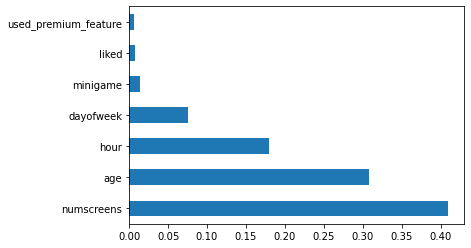

In [105]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x_Features,y_Features)

ranked_features=pd.Series(model.feature_importances_,index=x_Features.columns)
ranked_features.nlargest(7).plot(kind='barh')
plt.show()

In [77]:
appdata.drop(['user','screen_list','first_open','enrolled_date','liked'],axis=1,inplace= True)

In [78]:
x =appdata.drop(columns='enrolled')
y=appdata['enrolled']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , stratify=y)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier(n_estimators=10)
rf = rf.fit(X_train, y_train)

print("RandomForestClassifier")
print("train Score {}".format(rf.score(X_train,y_train)))
y_pred =rf.predict(X_test)
print("Test Score {}".format(accuracy_score(y_test,y_pred)))


from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc = abc.fit(X_train, y_train)

print("AdaBoostClassifier")
print(" train Score {}".format(abc.score(X_train,y_train)))
y_pred=abc.predict(X_test)
print("Test Score {}".format(accuracy_score(y_test,y_pred)))


RandomForestClassifier
train Score 0.9870857142857142
Test Score 0.7453333333333333
AdaBoostClassifier
 train Score 0.7361142857142857
Test Score 0.7362666666666666


In [84]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[3815 1863]
 [2001 7321]]
Accuracy Score 0.7424
Classification report:               precision    recall  f1-score   support

           0       0.66      0.67      0.66      5678
           1       0.80      0.79      0.79      9322

    accuracy                           0.74     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.74      0.74      0.74     15000



# RandomForestClassifier

In [85]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 30)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14,15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8,9,10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

#finall

{'n_estimators': [10, 44, 78, 112, 146, 180, 214, 248, 283, 317, 351, 385, 419, 453, 487, 522, 556, 590, 624, 658, 692, 726, 761, 795, 829, 863, 897, 931, 965, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14, 15, 20], 'min_samples_leaf': [1, 2, 4, 6, 8, 9, 10], 'criterion': ['entropy', 'gini']}


In [86]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2
                               ,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 9,
                                                             10],
                                        'min_samples_split': [2, 5, 10, 14, 15,
                                                              20],
                                        'n_estimators': [10, 44, 78, 112, 146,
                                                         180, 214, 248, 283,
                       

In [81]:
#rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=670, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=522)

In [87]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=450, max_features='sqrt', min_samples_split=14,
                       n_estimators=829)

In [90]:
best_random_grid=rf_randomcv.best_estimator_
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("train Score {}".format(best_random_grid.score(X_train,y_train)))
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

train Score 0.8853142857142857
[[3690 1988]
 [1499 7823]]
Accuracy Score 0.7675333333333333
Classification report:               precision    recall  f1-score   support

           0       0.71      0.65      0.68      5678
           1       0.80      0.84      0.82      9322

    accuracy                           0.77     15000
   macro avg       0.75      0.74      0.75     15000
weighted avg       0.76      0.77      0.77     15000



# AdaBoostClassifier

In [10]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
    
n_estimators=[500,700,100]

learning_rate=[0.0001, 0.001, 0.01, 0.1, 1.0]

#algorithm='SAMME.R' 



random_grid = {'base_estimator':[DecisionTreeClassifier(max_depth=5)],
                'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               #'algorithm': algorithm
             }
print(random_grid)

{'base_estimator': [DecisionTreeClassifier(max_depth=5)], 'n_estimators': [500, 700, 100], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}


In [11]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc_randomcv=RandomizedSearchCV(estimator=abc,param_distributions=random_grid,n_iter=10,cv=3,verbose=2
                               ,n_jobs=-1)
### fit the randomized model
abc_randomcv.fit(X_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'base_estimator': [DecisionTreeClassifier(max_depth=5)],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1.0],
                                        'n_estimators': [500, 700, 100]},
                   verbose=2)

In [12]:
abc_randomcv.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.01, n_estimators=700)

In [13]:
best_random_grid=abc_randomcv.best_estimator_
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("train Score {}".format(best_random_grid.score(X_train,y_train)))
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

train Score 0.7829428571428572
[[3764 1914]
 [1635 7687]]
Accuracy Score 0.7634
Classification report:               precision    recall  f1-score   support

           0       0.70      0.66      0.68      5678
           1       0.80      0.82      0.81      9322

    accuracy                           0.76     15000
   macro avg       0.75      0.74      0.75     15000
weighted avg       0.76      0.76      0.76     15000

